In [3]:
import numpy as np
from PIL import Image,ImageDraw
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from ipywidgets import  interactive
from glob import glob
import numpy.typing as npt

In [36]:
def split_images(img):
    height, width = img.shape
    frag1, frag2 = np.zeros((2, height, width, 2))
    m = np.random.rand(height, width) > 0.5
    
    transformations = [
        [[1, 0], [1, 0], [1, 0]],
        [[1, 1], [0, 1], [0, 1]],
        [[0, 0], [1, 0], [0, 1]],
        [[0, 1], [0, 1], [1, 0]]
    ]
    
    for elem in transformations:
        mask, a, b = elem
        img_mask, m_mask = mask
        x = (img == img_mask) & (m == m_mask)    
        frag1[x] = a
        frag2[x] = b

    frag1 = frag1.reshape(height, 2 * width).astype(bool)
    frag2 = frag2.reshape(height, 2 * width).astype(bool)
    return frag1, frag2

In [32]:
def merge_images(x, y):
    return x == y

In [33]:
def hide_image(img, frag1_path, frag2_path):
    img = Image.open(img).convert('L')
    img = np.array(img)
    img[img == 255] = 1

    frag1, frag2 = split_images(img)
    _,(ax1,ax2) = plt.subplots(1, 2, figsize=(10,10))
    ax1.imshow(frag1, cmap='gray')
    ax2.imshow(frag1, cmap='gray')
    plt.imsave(frag1_path, frag1, cmap='gray')
    plt.imsave(frag2_path, frag2, cmap='gray')
    plt.show()
    

In [34]:
def unhide(img1 ,img2):
    frag1 = Image.open(img1).convert('L')
    frag1= np.array(frag1)
    frag1[frag1 == 255] = 1
    
    frag2 = Image.open(img2).convert('L')
    frag2 = np.array(frag2)
    frag2[frag2 == 255] = 1

    z = merge_images(frag1, frag2)[::, ::2]    
    plt.imshow(z,cmap='gray')

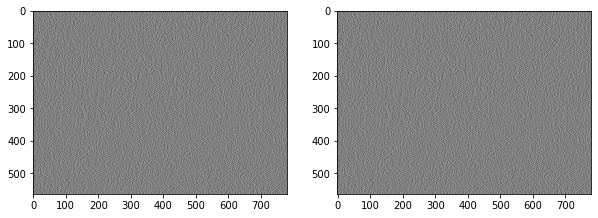

In [37]:
hide_image('obama.jpg', 'frag1.png', 'frag2.png')

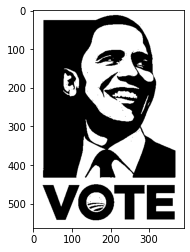

In [38]:
unhide('frag1.png', 'frag2.png')